# Proyek Casptone Klasifikasi Diabetes: DiaMate





In [10]:
import kagglehub
alexteboul_diabetes_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/diabetes-health-indicators-dataset')

print('Data source import complete.')


Data source import complete.


## Import Library yang Digunakan

In [11]:
!pip install tensorflowjs

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflowjs as tfjs
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report


from warnings import filterwarnings
filterwarnings('ignore')

## Data Preparation

### Data Loading

In [13]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [14]:
# Menampilkan dataset
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Data Preparation

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [16]:
data['Age']=data['Age'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Income']=data['Income'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['CholCheck']=data['CholCheck'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['Stroke']=data['Stroke'].astype('int64')
data['HeartDiseaseorAttack']=data['HeartDiseaseorAttack'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['Fruits']=data['Fruits'].astype('int64')
data['Veggies']=data['Veggies'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['AnyHealthcare']=data['AnyHealthcare'].astype('int64')
data['NoDocbcCost']=data['NoDocbcCost'].astype('int64')
data['GenHlth']=data['GenHlth'].astype('int64')
data['MentHlth']=data['MentHlth'].astype('int64')
data['PhysHlth']=data['PhysHlth'].astype('int64')
data['DiffWalk']=data['DiffWalk'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes_012']=data['Diabetes_012'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')
data['HighChol']=data['HighChol'].astype('int64')

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Data Cleaning

In [18]:
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [19]:
data.duplicated().sum()

np.int64(23899)

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(229781, 22)

Organize Columns

In [22]:
data = data.rename(columns={'Diabetes_012': 'Diabetes'})

In [23]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [24]:
data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,2
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


**EDA**

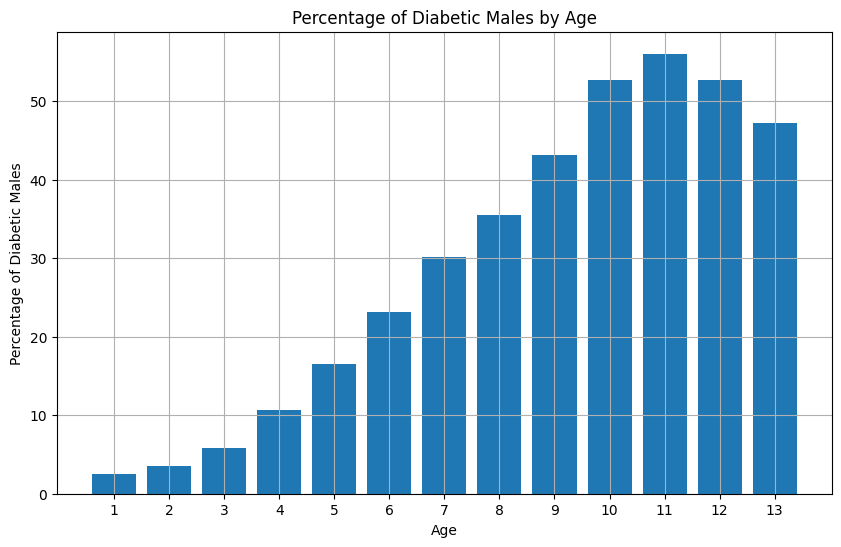

Maximum percentage of diabetic males is 56.05% at age 11.


In [25]:
# frekuensi penderita diabetes dari segala usia untuk pria

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


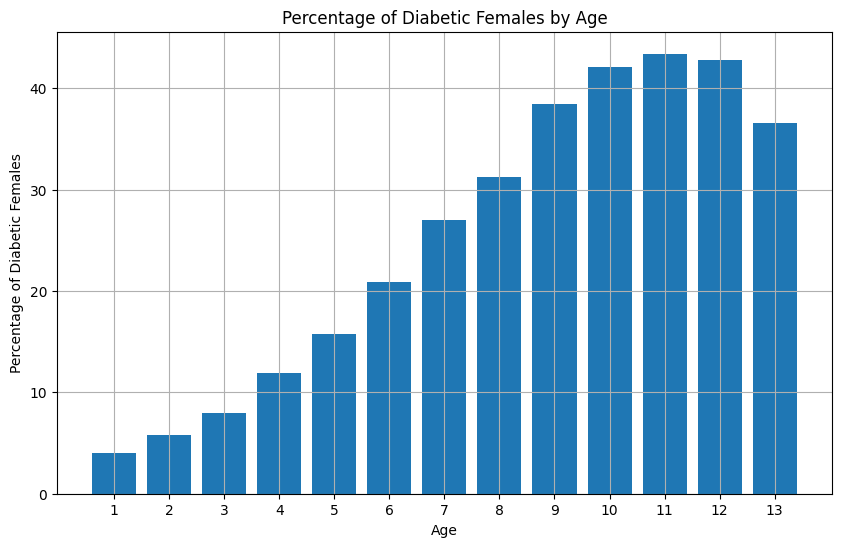

Maximum percentage of diabetic females is 43.42% at age 11.


In [26]:
# frekuensi penderita diabetes dari segala usia untuk perempuan

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


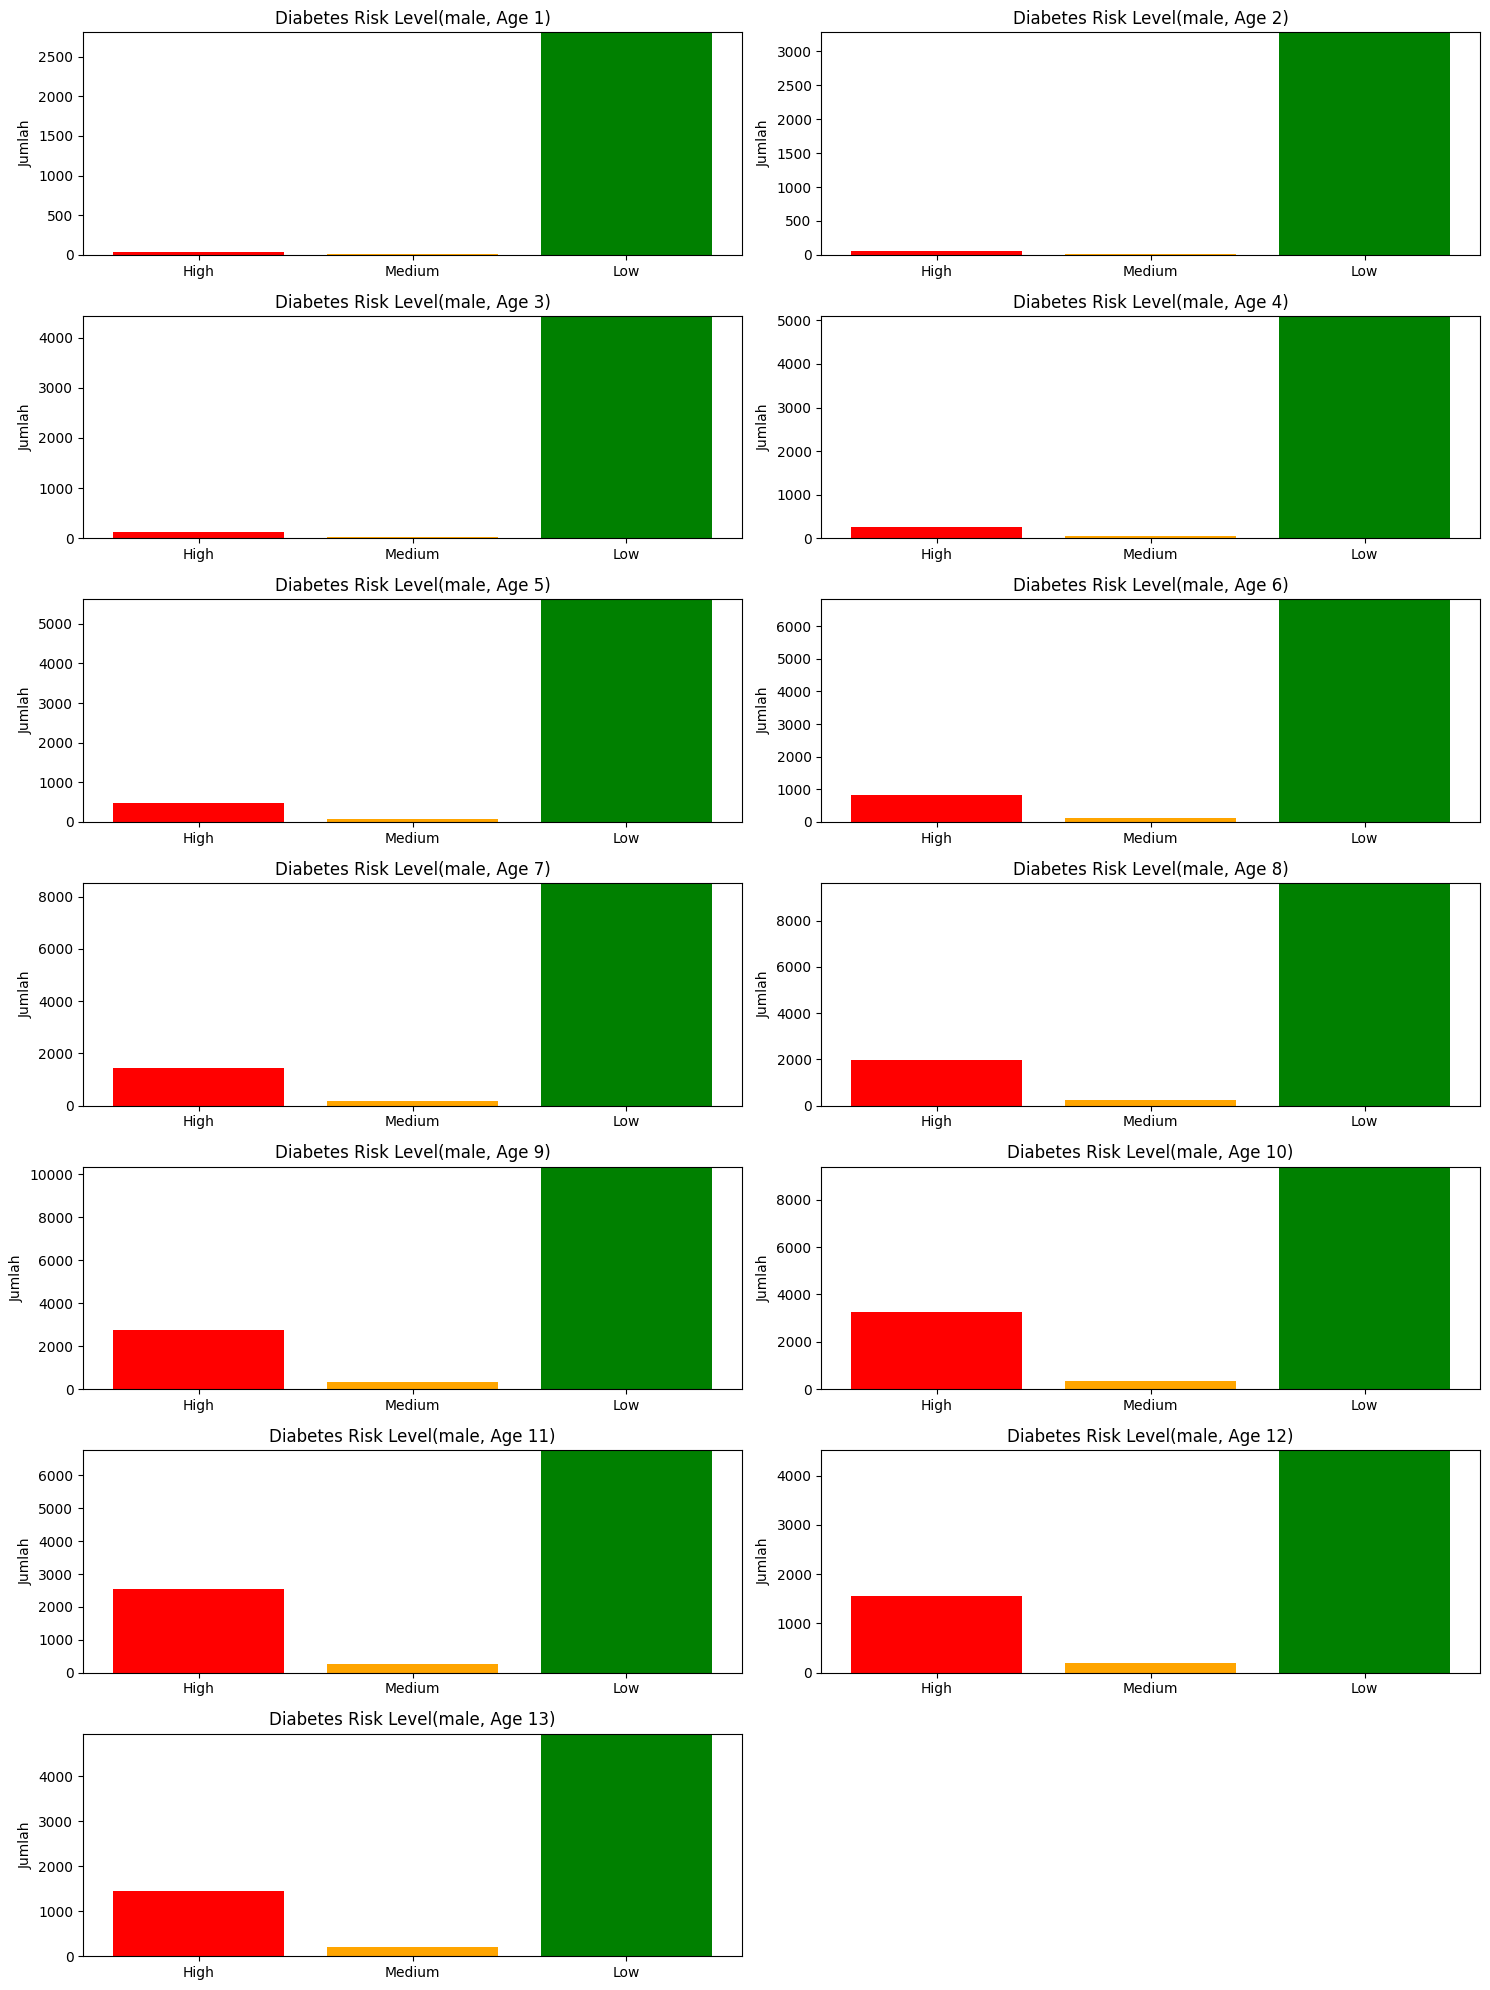

In [27]:
# persentase penderita diabetes dan non-diabetes untuk pria dalam rentang semua usia

plt.figure(figsize=(15, 20))

for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)

    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]

    diabetic_male = len(df_male[df_male['Diabetes'] == 2])
    prediabetic_male = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_male = len(df_male[df_male['Diabetes'] == 0])

    categories = ['High', 'Medium', 'Low']
    counts = [diabetic_male, prediabetic_male, non_diabetic_male]

    plt.bar(categories, counts, color=['red', 'orange', 'green'])
    plt.title(f'Diabetes Risk Level(male, Age {age})')
    plt.ylabel('Jumlah')
    plt.ylim(0, max(counts) + 1)  # Tambah margin untuk estetika

plt.tight_layout()
plt.show()


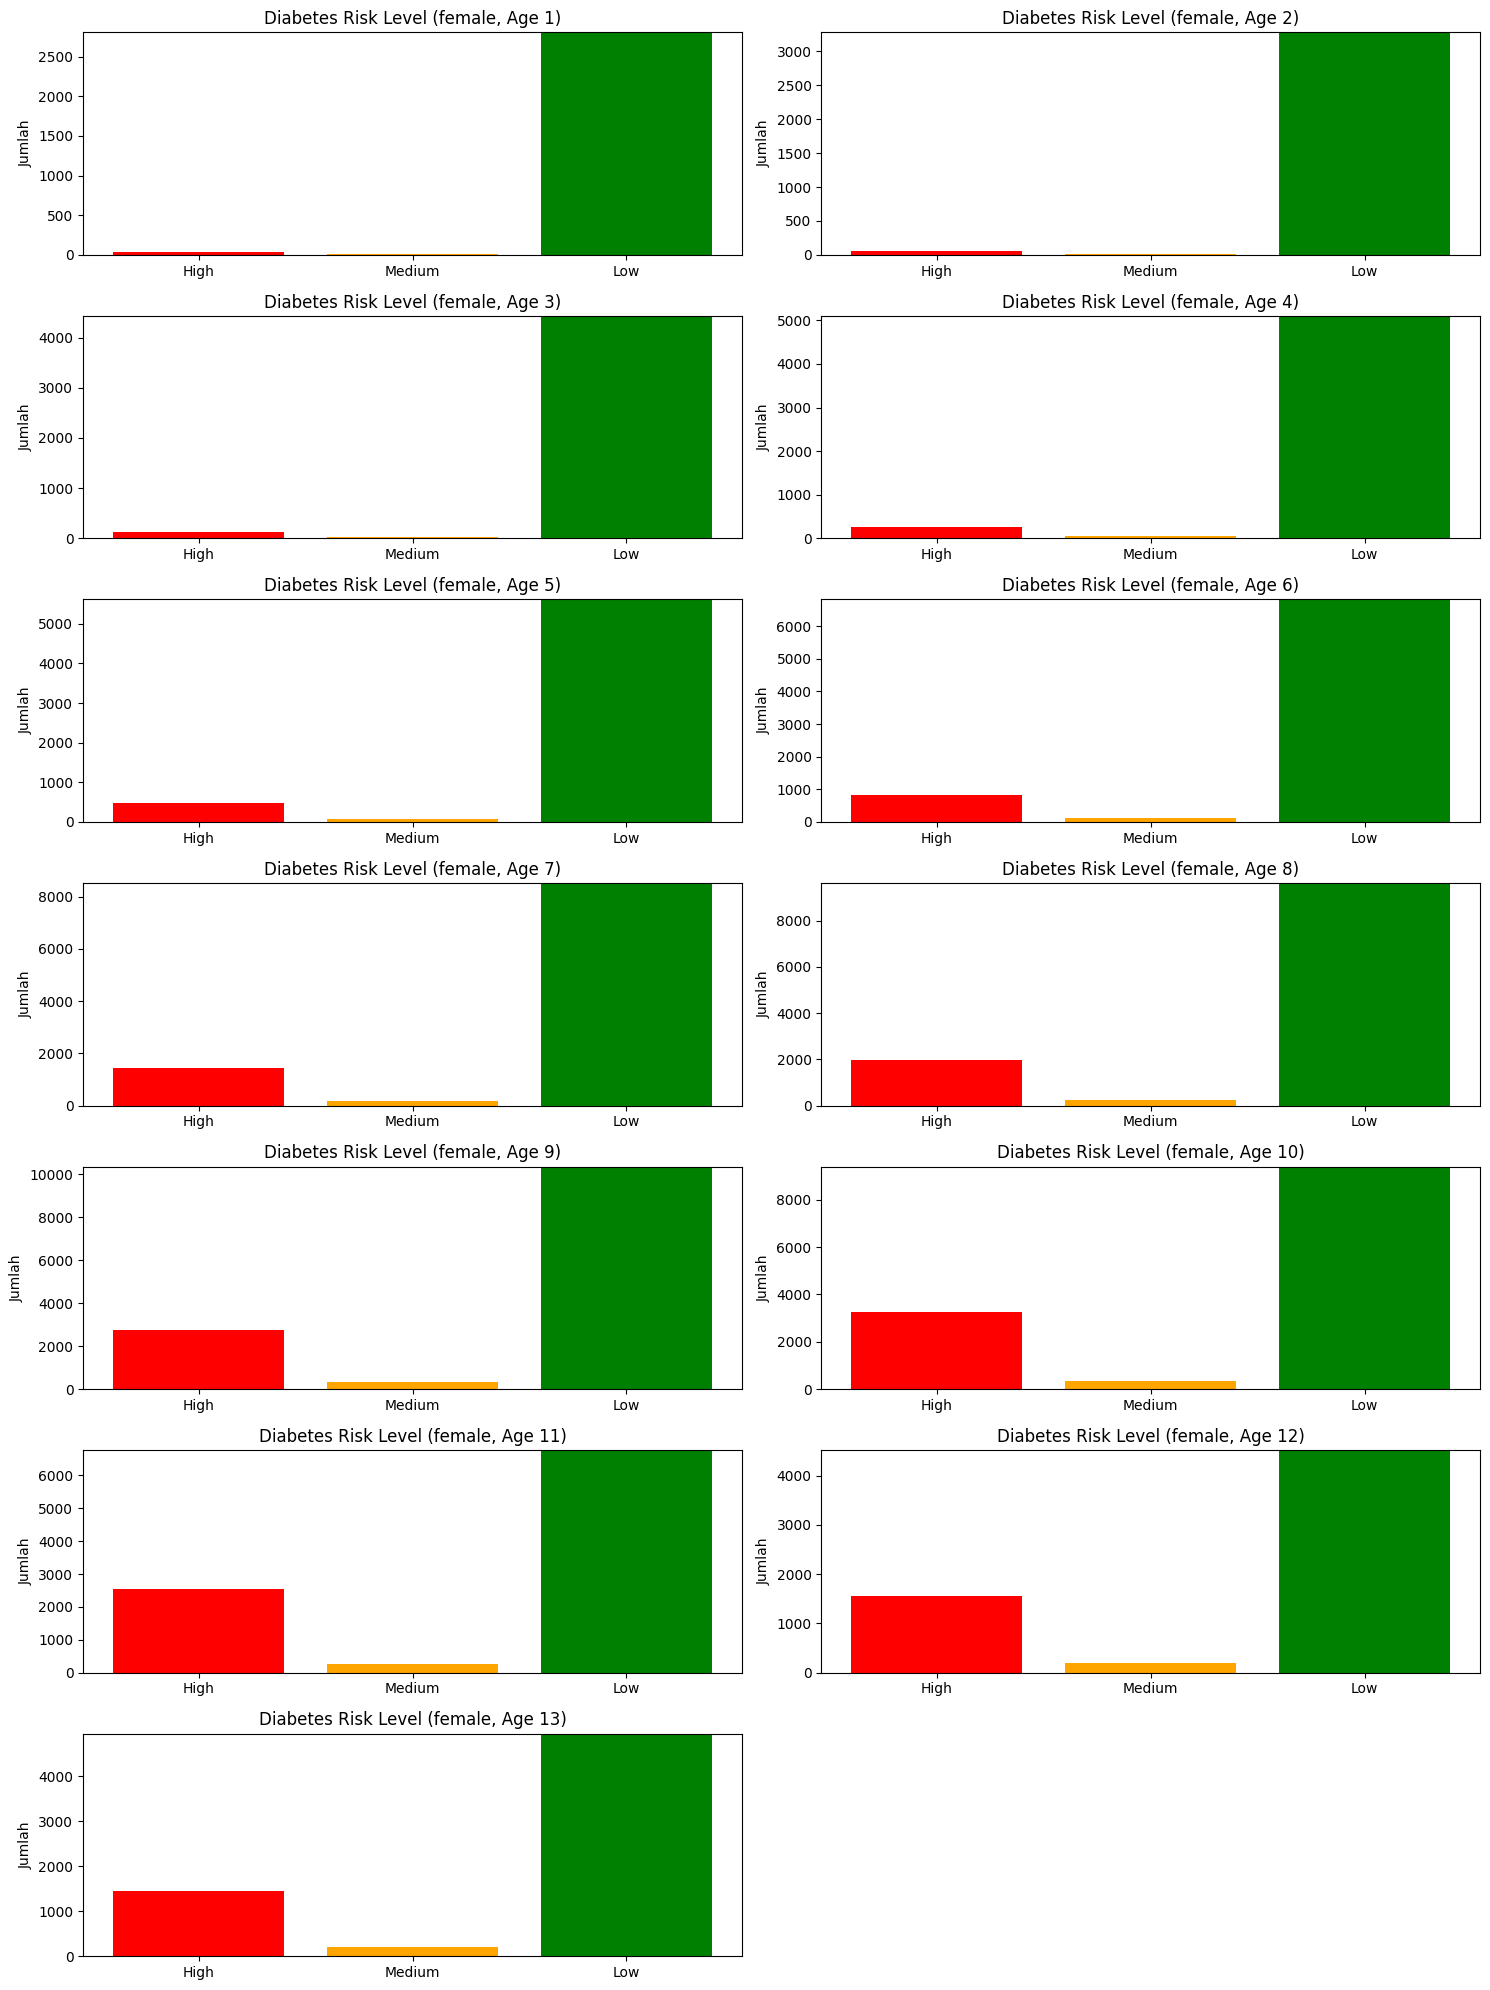

In [28]:
# percentage of diabetics and nondiabetics for female in range of all age

plt.figure(figsize=(15, 20))

for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)

    df_male = data[(data['Sex'] == 1) & (data['Age'] == age)]

    diabetic_female = len(df_male[df_male['Diabetes'] == 2])
    prediabetic_female = len(df_male[df_male['Diabetes'] == 1])
    non_diabetic_female = len(df_male[df_male['Diabetes'] == 0])

    categories = ['High', 'Medium', 'Low']
    counts = [diabetic_female, prediabetic_female, non_diabetic_female]

    plt.bar(categories, counts, color=['red', 'orange', 'green'])
    plt.title(f'Diabetes Risk Level (female, Age {age})')
    plt.ylabel('Jumlah')
    plt.ylim(0, max(counts) + 1)  # Tambah margin untuk estetika

plt.tight_layout()
plt.show()



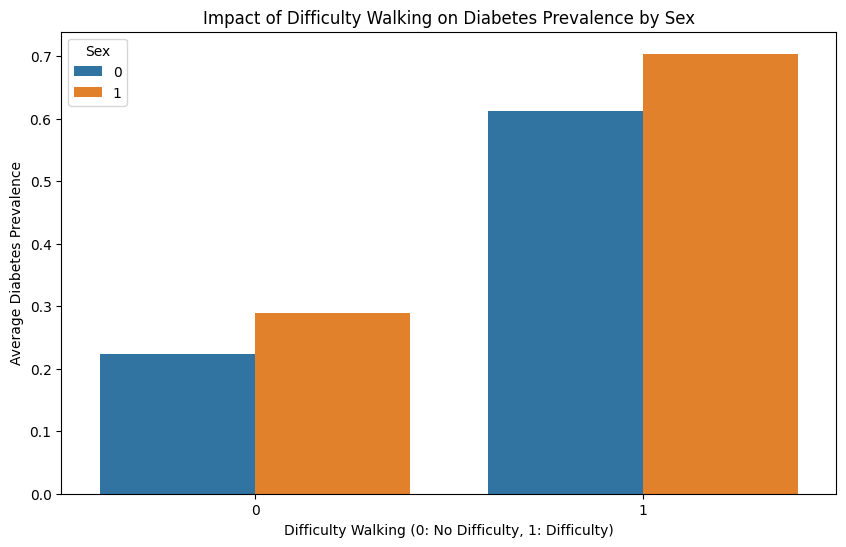

In [33]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()


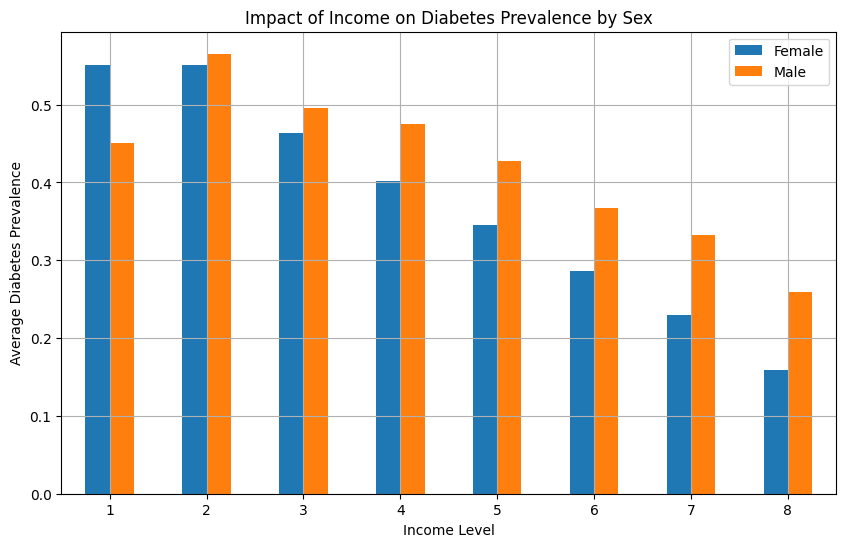

In [35]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

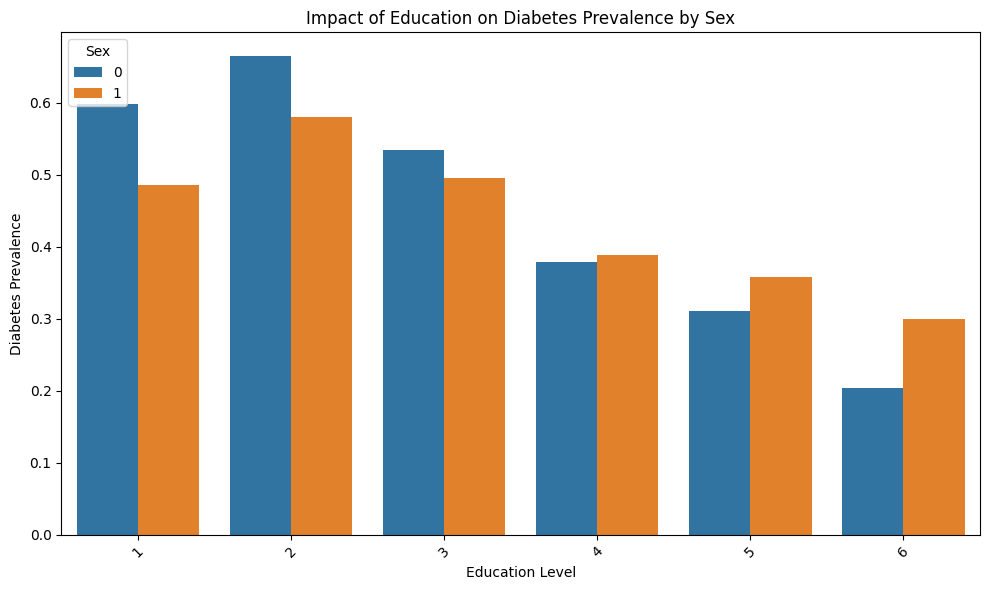

In [36]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()


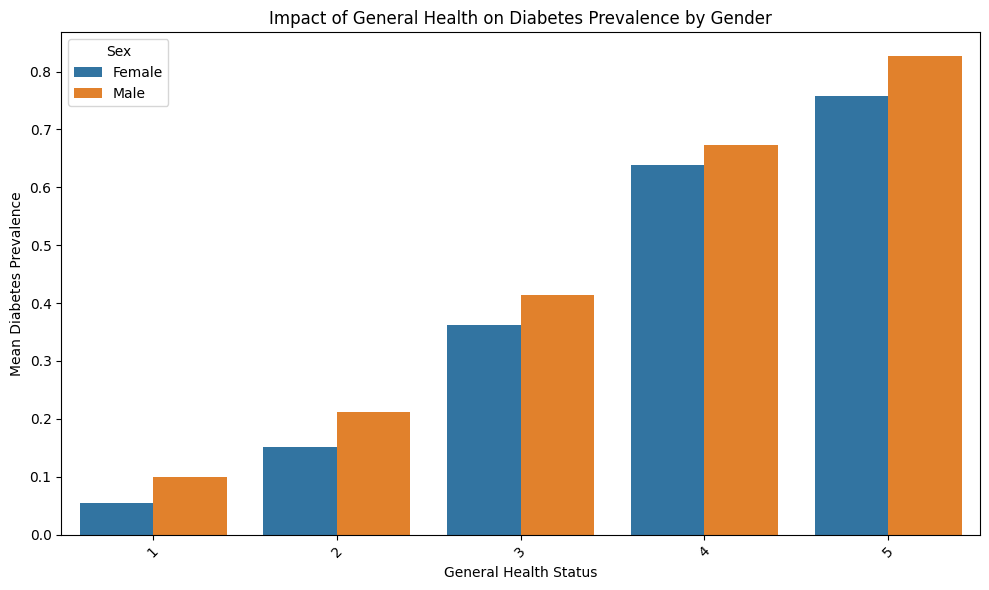

In [37]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


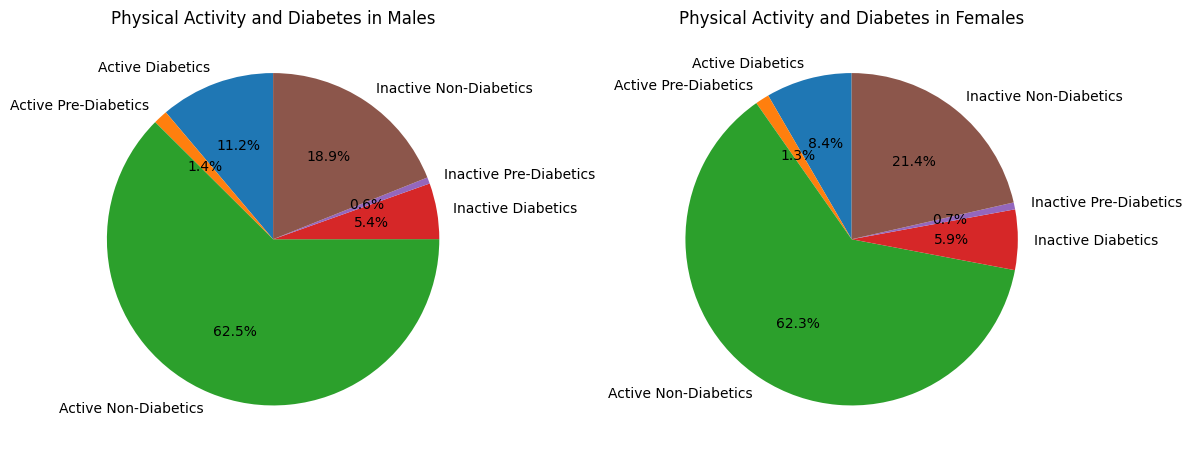

In [39]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 2)].shape[0]
male_active_prediabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 2)].shape[0]
male_inactive_prediabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 2)].shape[0]
female_active_prediabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 2)].shape[0]
female_inactive_prediabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_prediabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_prediabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Pre-Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Pre-Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_prediabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_prediabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Pre-Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Pre-Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()


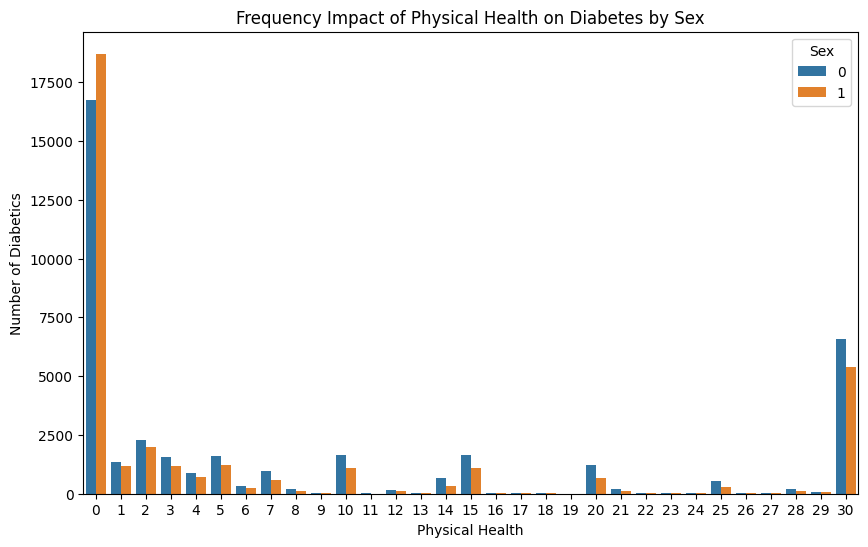

In [41]:
#the frequency impact of   physicalhlth  in diabetic for male and female

# physicalhlth :- which includes physical illness and injury, for how many days during the past 30
diabetic_by_sex_physhlth = data.groupby(['Sex', 'PhysHlth'])['Diabetes'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PhysHlth', y='Diabetes', hue='Sex', data=diabetic_by_sex_physhlth)
plt.xlabel('Physical Health')
plt.ylabel('Number of Diabetics')
plt.title('Frequency Impact of Physical Health on Diabetes by Sex')
plt.show()


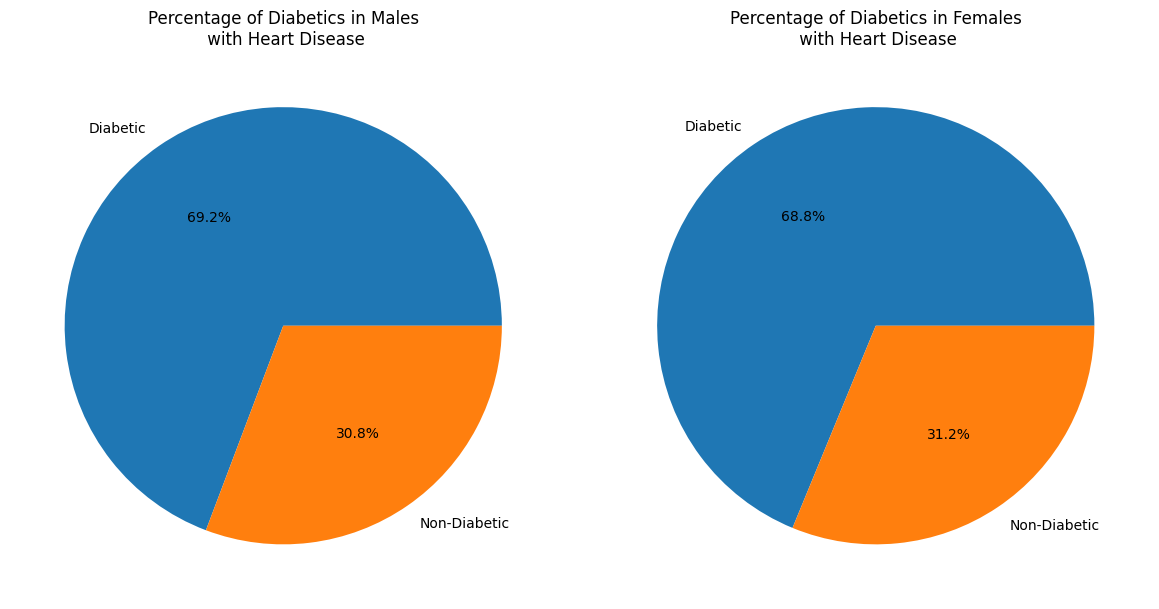

Percentage of diabetics in males with heart disease: 69.2%
Percentage of diabetics in males without heart disease: 29.9%
Percentage of diabetics in females with heart disease: 68.8%
Percentage of diabetics in females without heart disease: 27.2%


In [42]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")


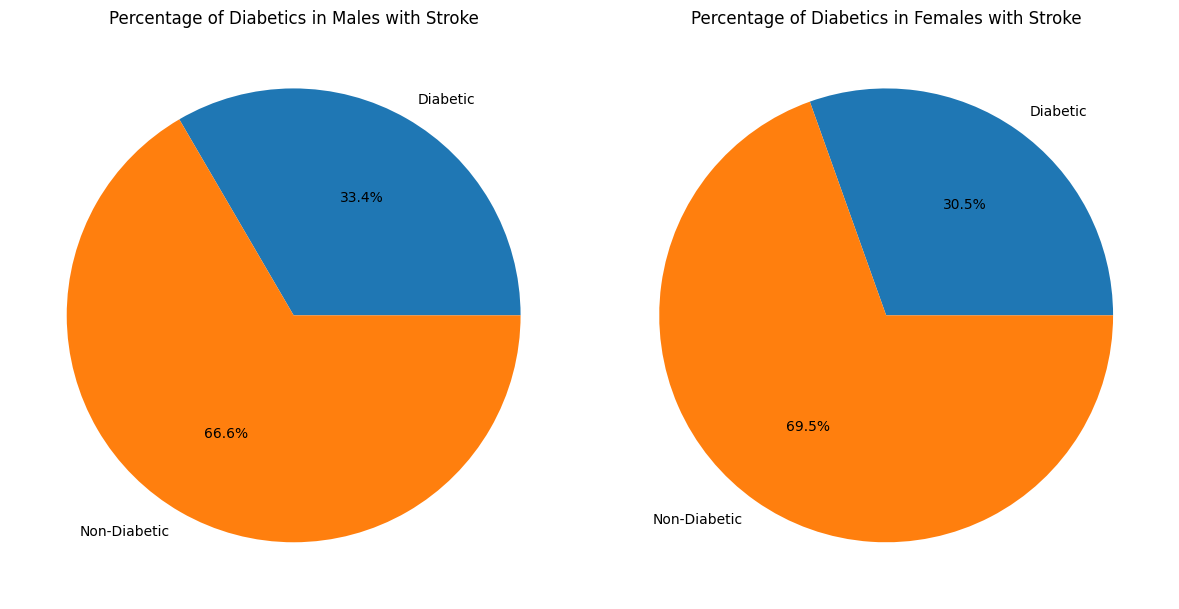

Percentage of diabetics in males with stroke: 33.4%
Percentage of diabetics in females with stroke: 30.5%


In [55]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 2])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 2])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")


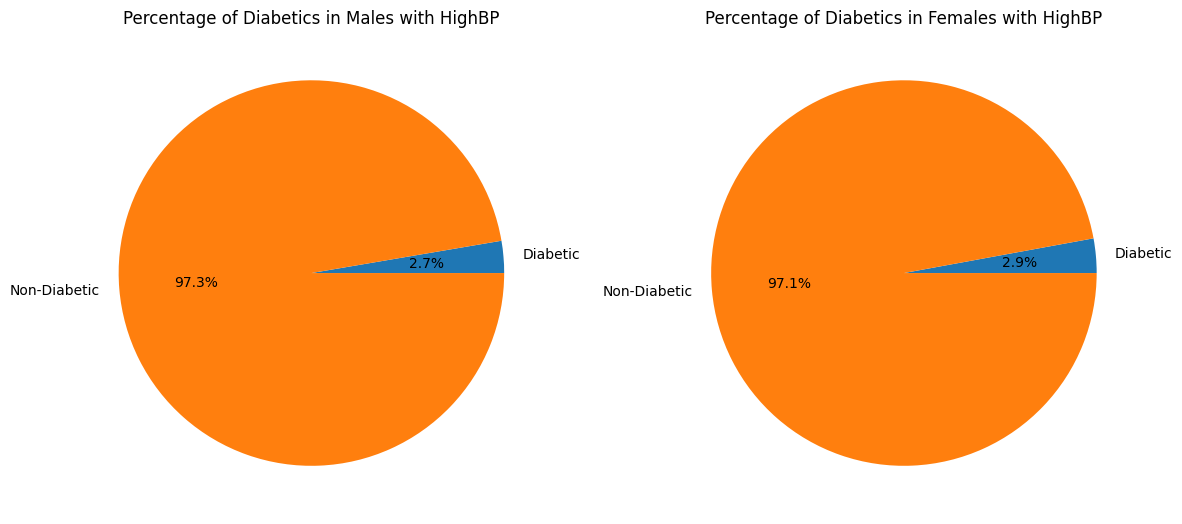

Percentage of diabetics in males with HighBP: 2.7%
Percentage of diabetics in females with HighBP: 2.9%


In [56]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")


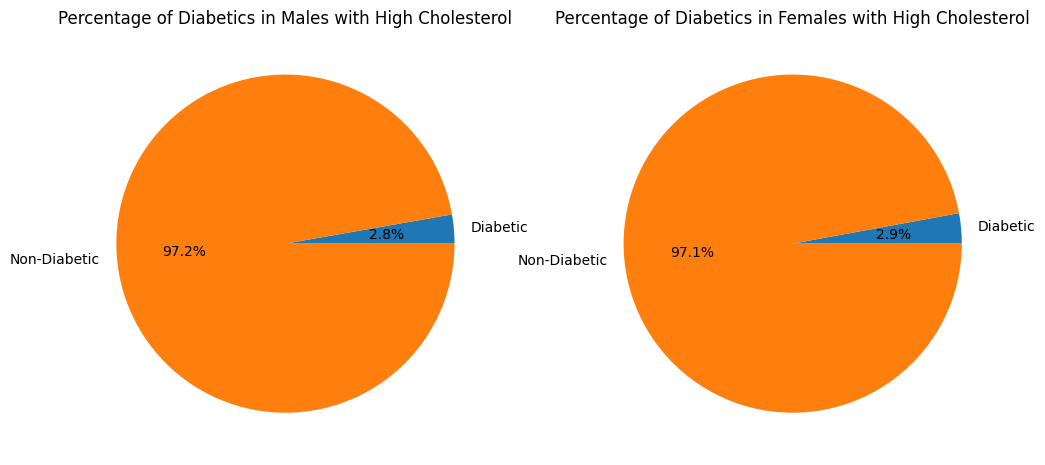

In [58]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

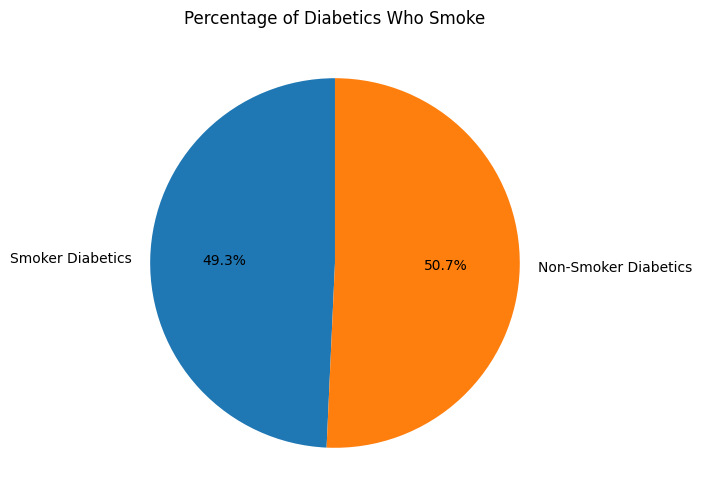

In [59]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()


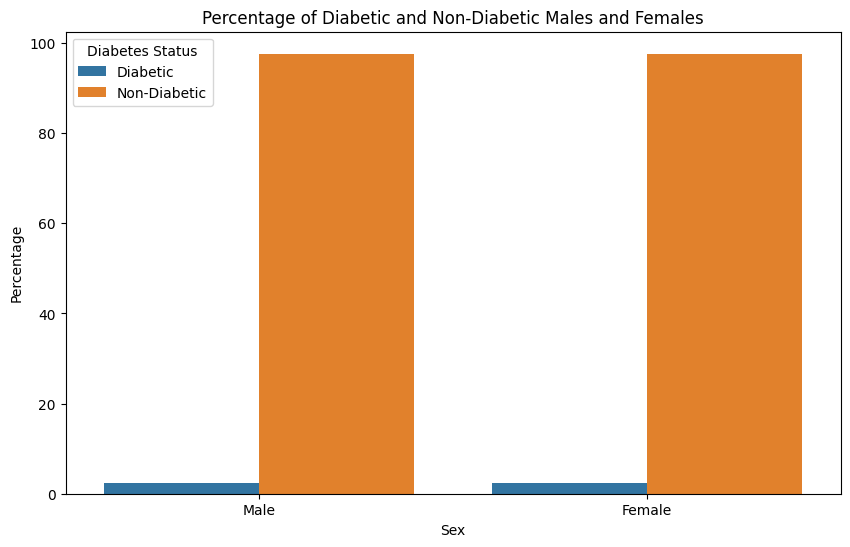

In [60]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

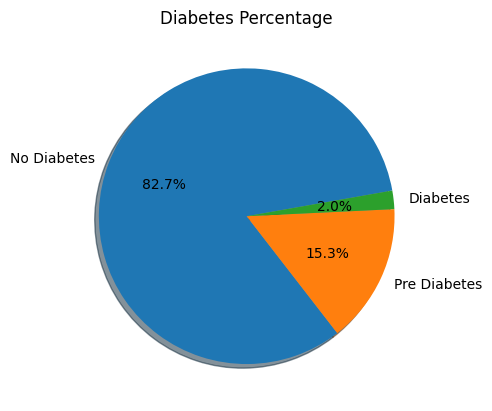

In [61]:
labels = ['No Diabetes', 'Pre Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()


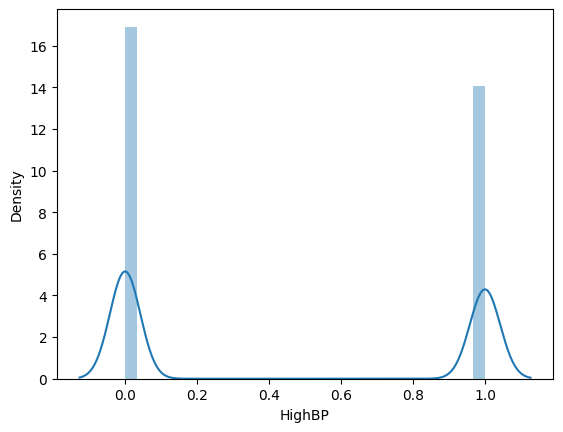

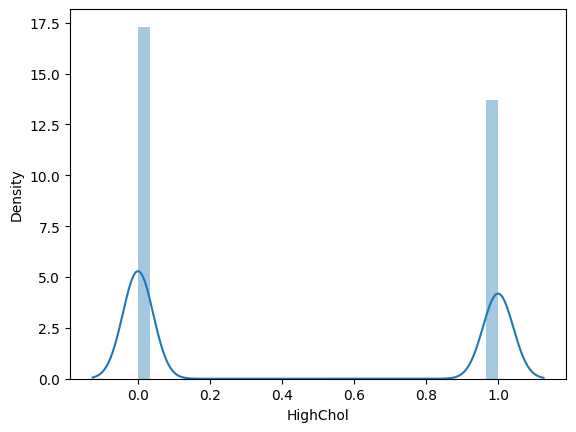

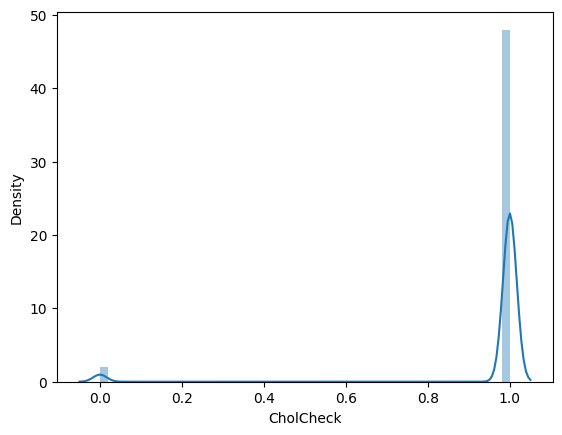

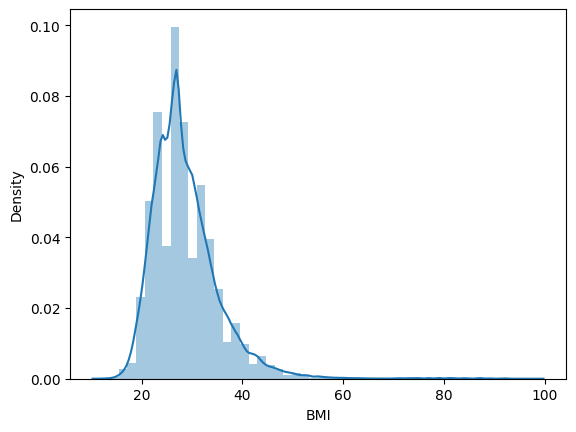

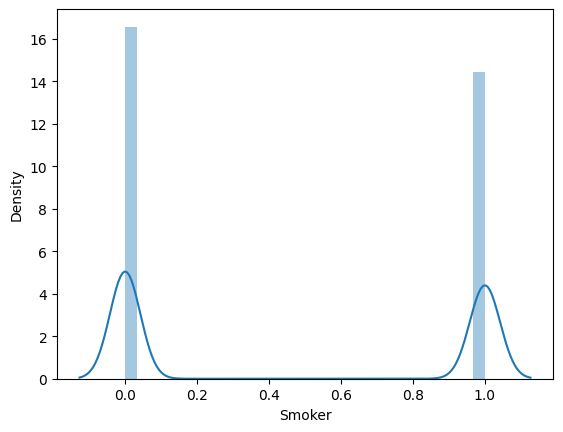

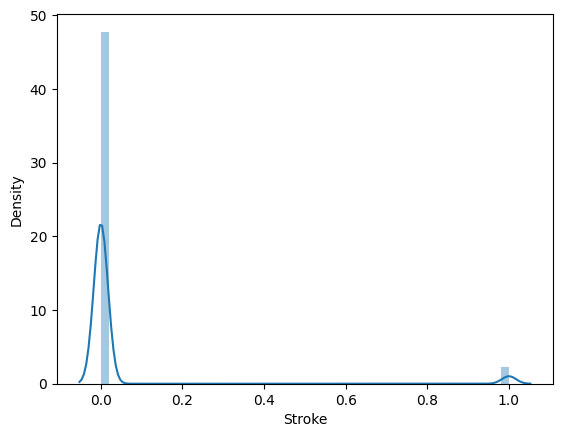

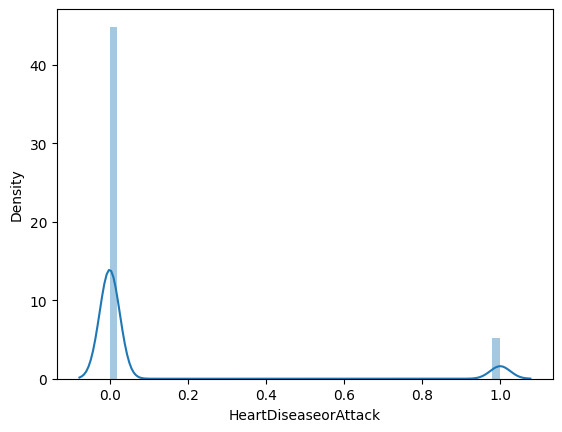

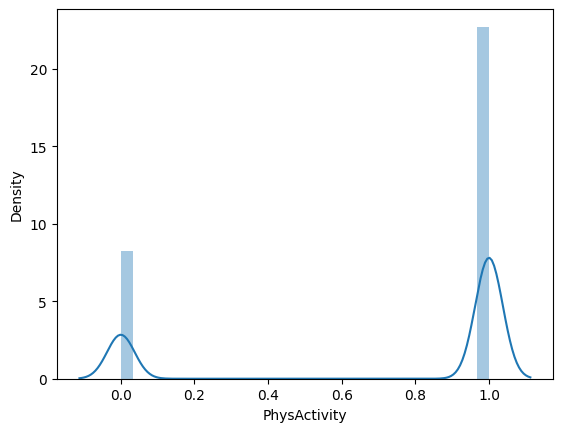

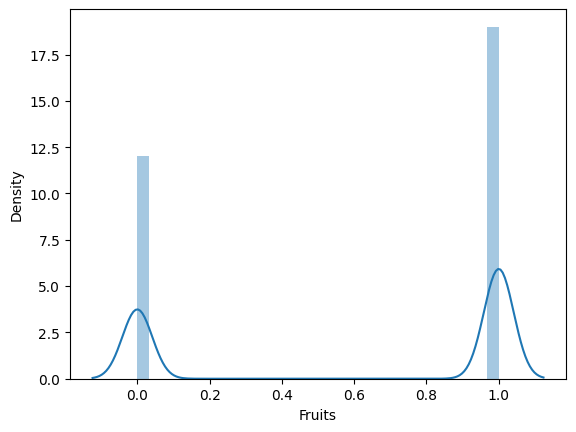

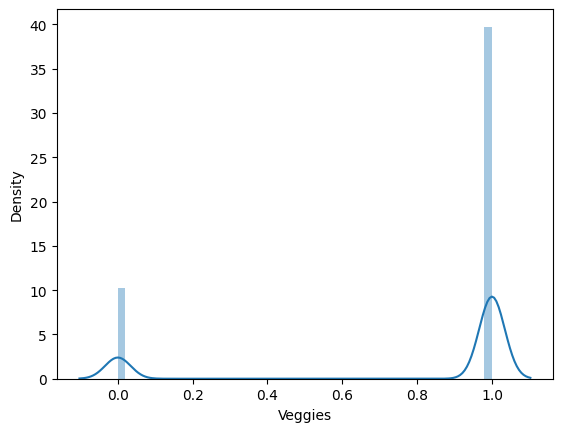

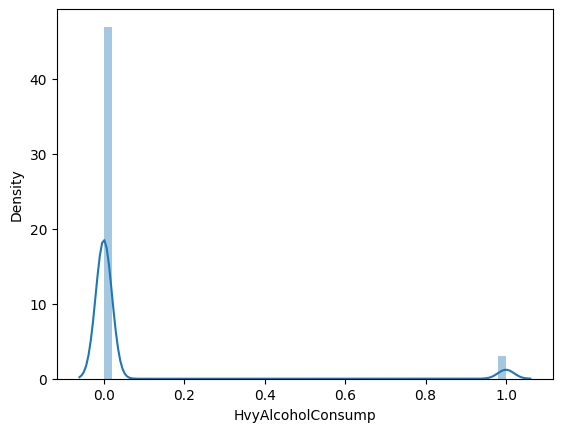

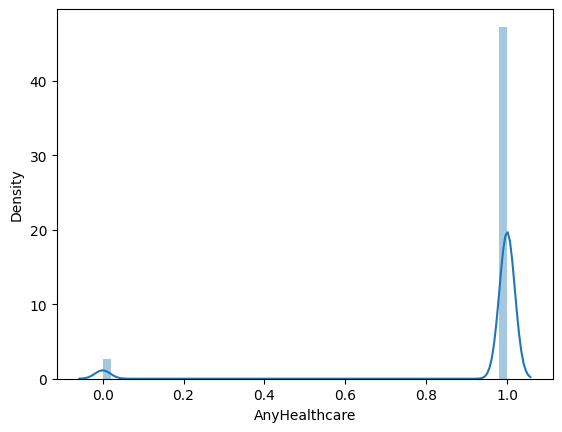

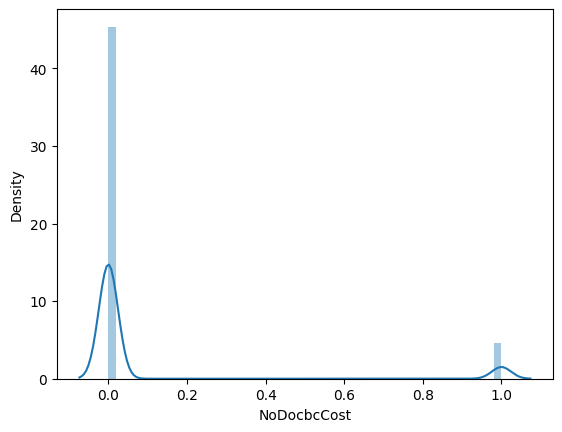

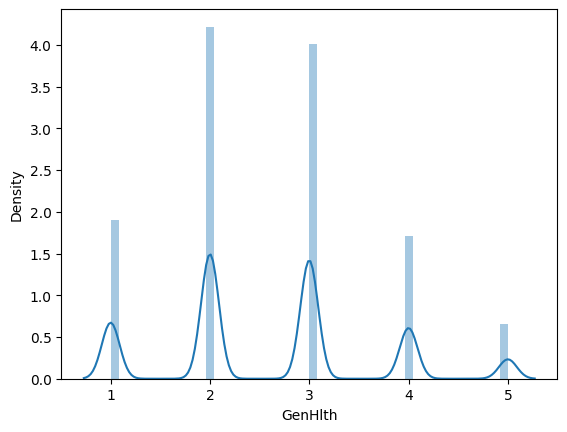

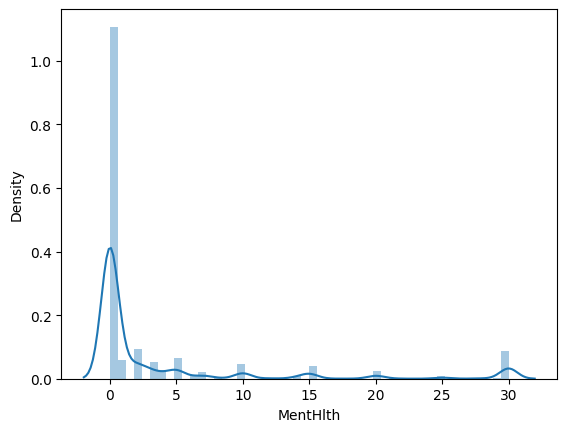

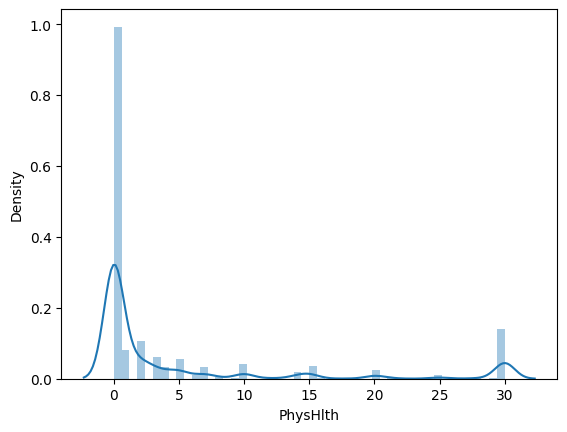

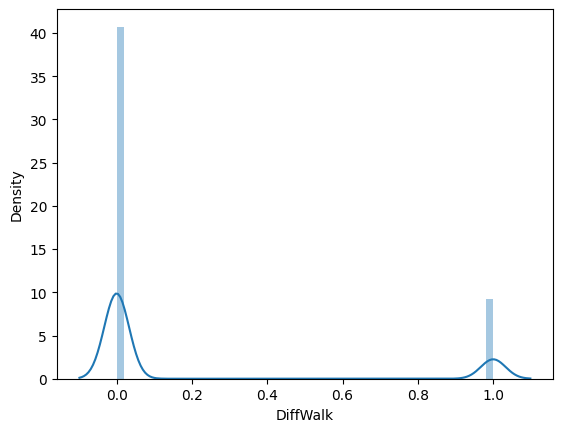

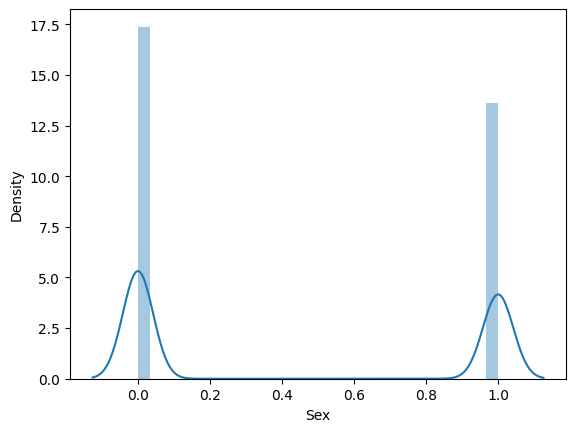

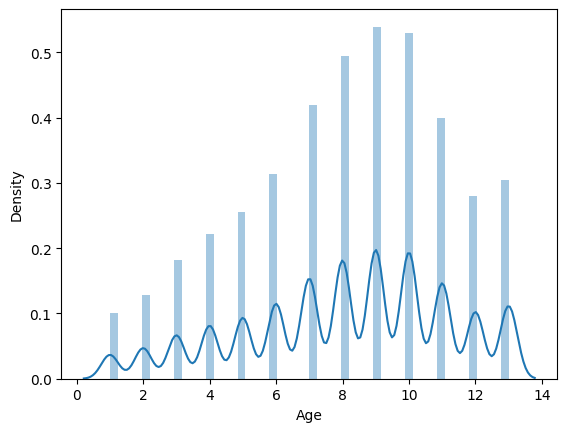

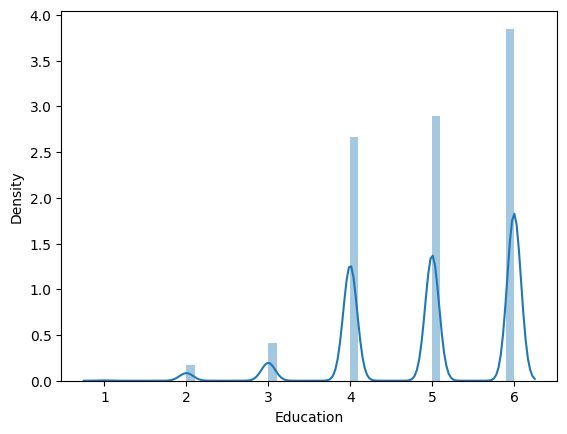

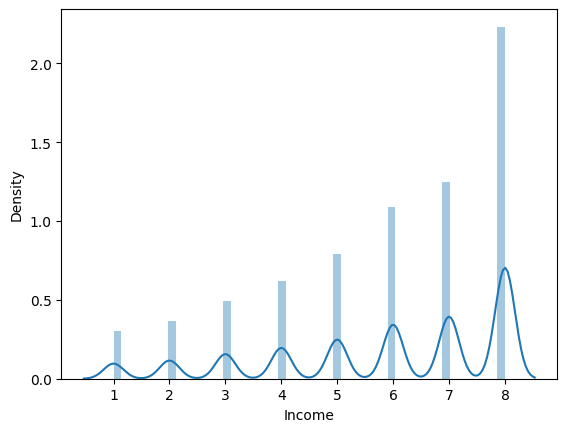

In [62]:
for col in data.columns[:-1]:
  sns.distplot(data[col])
  plt.show()

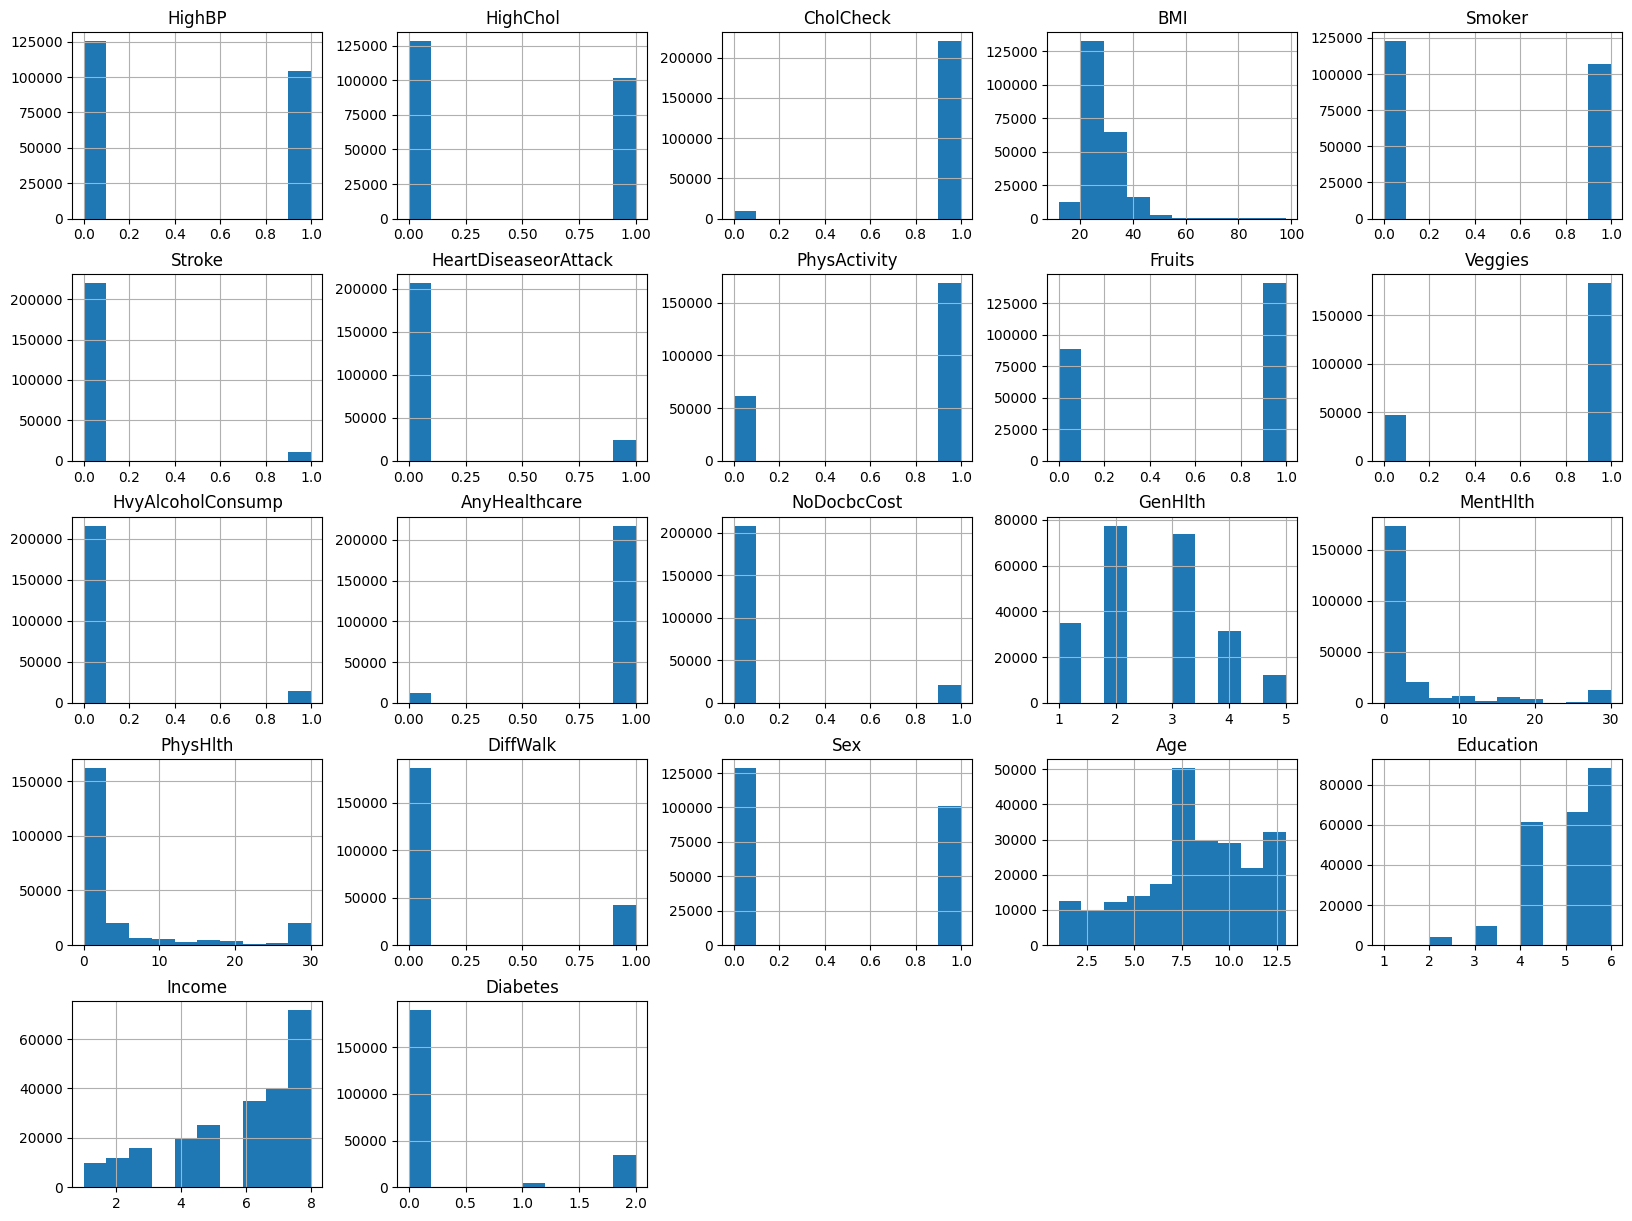

In [63]:
data.hist(figsize=(20,15))
plt.show()

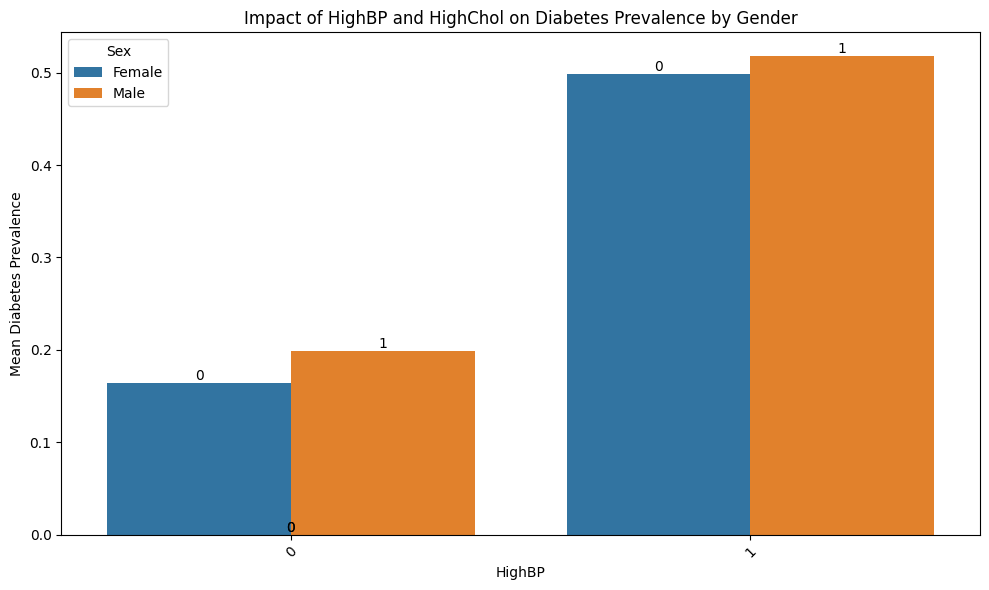

In [64]:
# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


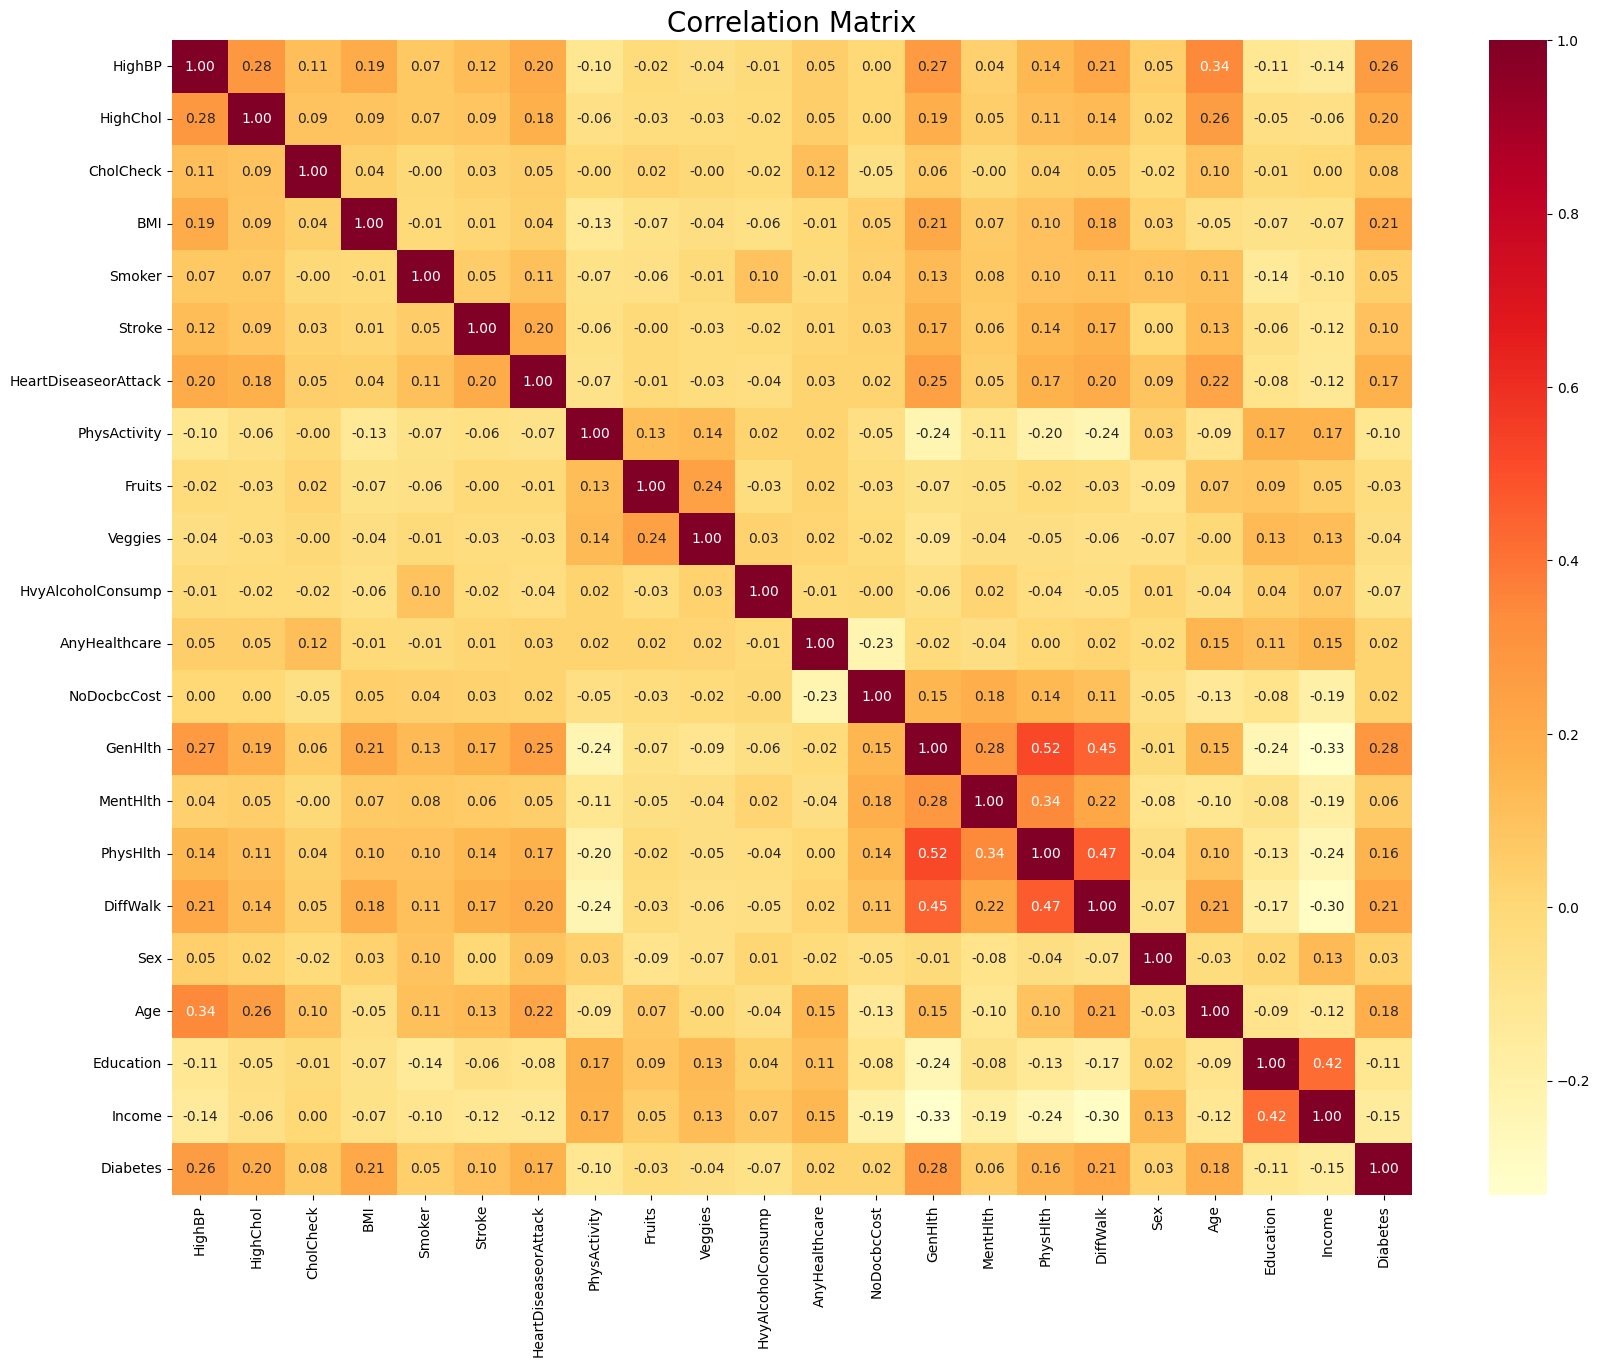

In [65]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Splitting**

In [66]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,40,0,0,0,0,1,5,15,1,0,9,4,3,0
1,0,0,25,0,0,1,0,0,3,0,0,0,7,6,1,0
2,1,1,28,0,0,0,0,1,5,30,1,0,9,4,8,0
3,1,0,27,0,0,1,0,1,2,0,0,0,11,3,6,0
4,1,1,24,0,0,1,0,1,2,0,0,0,11,5,4,0


In [70]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Pilihan Anda (y > 0).astype(int) mengelompokkan 1 dan 2 menjadi 1.
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
print(f"Number of features: {num_features}")
image_dim = int(np.ceil(np.sqrt(num_features)))
print(f"Pseudo-image dimension: {image_dim}x{image_dim}")

# Padding jika perlu
def pad_features(x, target_dim):
    # Calculate the required padding size
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
         # This should not happen if image_dim is calculated correctly
         raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

print(f"Shape of x_train_cnn: {x_train_cnn.shape}")
print(f"Shape of x_test_cnn: {x_test_cnn.shape}")


cnn_model = Sequential()

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_dim, image_dim, 1), padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) #
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_data=(x_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")


Number of features: 15
Pseudo-image dimension: 4x4
Shape of x_train_cnn: (183824, 4, 4, 1)
Shape of x_test_cnn: (45957, 4, 4, 1)
Epoch 1/5
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8271 - loss: 0.3958 - val_accuracy: 0.8368 - val_loss: 0.3684
Epoch 2/5
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8339 - loss: 0.3751 - val_accuracy: 0.8363 - val_loss: 0.3675
Epoch 3/5
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8360 - loss: 0.3717 - val_accuracy: 0.8372 - val_loss: 0.3665
Epoch 4/5
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8343 - loss: 0.3737 - val_accuracy: 0.8370 - val_loss: 0.3661
Epoch 5/5
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8356 - loss: 0.3723 - val_accuracy: 0.8363 - val_loss: 0.3676
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8369 - loss: 0.3667
CNN Loss: 0.3676355183124542, CNN Accuracy: 0.8363470435142517


In [72]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Pilihan Anda (y > 0).astype(int) mengelompokkan 1 dan 2 menjadi 1.
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
print(f"Number of features: {num_features}")
image_dim = int(np.ceil(np.sqrt(num_features)))
print(f"Pseudo-image dimension: {image_dim}x{image_dim}")

# Padding jika perlu
def pad_features(x, target_dim):
    # Calculate the required padding size
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
         # This should not happen if image_dim is calculated correctly
         raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

print(f"Shape of x_train_cnn: {x_train_cnn.shape}")
print(f"Shape of x_test_cnn: {x_test_cnn.shape}")


cnn_model2 = Sequential()

cnn_model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))

cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model2.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2))) #
cnn_model2.add(Flatten())
cnn_model2.add(Dense(64, activation='relu'))
cnn_model2.add(Dropout(0.2))
cnn_model2.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model2.fit(x_train_cnn, y_train, epochs=5, batch_size=16, validation_data=(x_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model2.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")


Number of features: 15
Pseudo-image dimension: 4x4
Shape of x_train_cnn: (183824, 4, 4, 1)
Shape of x_test_cnn: (45957, 4, 4, 1)
Epoch 1/5
11489/11489 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8288 - loss: 0.3901 - val_accuracy: 0.8365 - val_loss: 0.3690
Epoch 2/5
11489/11489 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8357 - loss: 0.3723 - val_accuracy: 0.8360 - val_loss: 0.3683
Epoch 3/5
11489/11489 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.8348 - loss: 0.3743 - val_accuracy: 0.8362 - val_loss: 0.3697
Epoch 4/5
11489/11489 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8363 - loss: 0.3725 - val_accuracy: 0.8370 - val_loss: 0.3710
Epoch 5/5
11489/11489 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8346 - loss: 0.3737 - val_accuracy: 0.8369 - val_loss: 0.3680
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8375 - loss: 0.3669
CNN Loss: 0.3679794371128082, CNN Accuracy: 0.8368692398071289


In [81]:
# Select features and target, drop columns as done previously
data1 = data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])

x = data1.drop('Diabetes', axis=1)
y = data1['Diabetes']

# Normalisasi data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Binarisasi target
y_binary = (y > 0).astype(int)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_binary, test_size=0.2, random_state=42)

# Reshape ke bentuk "pseudo-image"
num_features = x_train.shape[1]
image_dim = int(np.ceil(np.sqrt(num_features)))

def pad_features(x, target_dim):
    padding_size = (target_dim * target_dim) - x.shape[1]
    if padding_size < 0:
        raise ValueError("Target dimension is too small for the number of features.")
    padded = np.zeros((x.shape[0], target_dim * target_dim))
    padded[:, :x.shape[1]] = x
    return padded.reshape(-1, target_dim, target_dim, 1)

x_train_cnn = pad_features(x_train, image_dim)
x_test_cnn = pad_features(x_test, image_dim)

# Model CNN
cnn_model3 = Sequential()
cnn_model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_model3.add(LeakyReLU(alpha=0.1))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Flatten())
cnn_model3.add(Dense(64, activation='relu'))
cnn_model3.add(Dropout(0.2))
cnn_model3.add(Dense(1, activation='sigmoid'))

# Compile
cnn_model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Tambahkan EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train dengan early stopping
history = cnn_model3.fit(
    x_train_cnn, y_train,
    epochs=20,  # bisa lebih dari 5 sekarang
    batch_size=32,
    validation_data=(x_test_cnn, y_test),
    callbacks=[early_stop]
)

checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")

# Evaluasi
cnn_loss, cnn_accuracy = cnn_model3.evaluate(x_test_cnn, y_test)
print(f"CNN Loss: {cnn_loss}, CNN Accuracy: {cnn_accuracy}")

Epoch 1/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step - accuracy: 0.8299 - loss: 0.3920 - val_accuracy: 0.8350 - val_loss: 0.3677
Epoch 2/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8352 - loss: 0.3721 - val_accuracy: 0.8380 - val_loss: 0.3721
Epoch 3/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8363 - loss: 0.3721 - val_accuracy: 0.8377 - val_loss: 0.3657
Epoch 4/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8359 - loss: 0.3733 - val_accuracy: 0.8370 - val_loss: 0.3685
Epoch 5/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8357 - loss: 0.3702 - val_accuracy: 0.8370 - val_loss: 0.3658
Epoch 6/20
5745/5745 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8364 - loss: 0.3720 - val_accuracy: 0.8356 - val_loss: 0.3661
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8383 - loss: 0.3644
CNN Loss: 0.365657240152359, CNN Accuracy: 0.8377396464347839


In [82]:
def predict_diabetes(model, scaler_obj, target_image_dim):
    print("\n=== Diabetes Risk Assessment ===")
    print("Please answer the following health-related questions:\n")

    # Define the features in the same order as the input data used for training
    # Exclude the columns dropped before splitting
    feature_order = ['HighBP', 'HighChol', 'BMI', 'Stroke', 'HeartDiseaseorAttack',
                     'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare',
                     'GenHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

    questions = {
        'HighBP': ("Apakah Anda memiliki tekanan darah tinggi? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HighChol': ("Apakah Anda memiliki kadar kolesterol tinggi? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'BMI': ("Berapa nilai Indeks Massa Tubuh (BMI) Anda? (contoh: antara 10 - 50): ", 10, 50),
        'Stroke': ("Apakah Anda pernah mengalami stroke? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HeartDiseaseorAttack': ("Apakah Anda memiliki penyakit jantung atau pernah mengalami serangan jantung? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'PhysActivity': ("Apakah Anda rutin melakukan aktivitas fisik? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'HvyAlcoholConsump': ("Apakah Anda mengonsumsi alkohol dalam jumlah berlebihan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'AnyHealthcare': ("Apakah Anda memiliki akses terhadap layanan kesehatan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'GenHlth': ("Bagaimana kondisi kesehatan umum Anda? (1 = Sangat Sehat, 2 = Sehat, 3 = Cukup, 4 = Kurang Sehat, 5 = Sakit): ", 1, 5),
        'PhysHlth': ("Berapa hari dalam 30 hari terakhir Anda mengalami masalah kesehatan fisik? (0 - 30): ", 0, 30),
        'DiffWalk': ("Apakah Anda mengalami kesulitan saat berjalan? (0 = Tidak, 1 = Ya): ", [0, 1]),
        'Sex': ("Jenis kelamin Anda? (0 = Perempuan, 1 = Laki-laki): ", [0, 1]),
        'Age': ("Kelompok usia Anda? (1 = 18-24, 2 = 25-29, ..., 13 = 80 tahun ke atas): ", 1, 13),
        'Education': ("Tingkat pendidikan Anda? (1 = Tidak Sekolah, ..., 6 = Perguruan Tinggi): ", 1, 6),
        'Income': ("Tingkat pendapatan Anda? (1 = Terendah, ..., 8 = Tertinggi): ", 1, 8)
    }

    user_features = {}

    for key in feature_order:
         question, *valid = questions[key]
         while True:
            try:
                user_input = input(question)

                if len(valid) == 1:
                    value = int(user_input)
                    if value not in valid[0]:
                        raise ValueError(f"Please enter {valid[0][0]} or {valid[0][1]}")
                else:
                    value = int(user_input)
                    if not (valid[0] <= value <= valid[1]):
                        raise ValueError(f"Please enter between {valid[0]} and {valid[1]}")

                user_features[key] = value
                break

            except ValueError as e:
                print(f"Invalid input: {e}. Please try again.")

    # Convert user input dictionary to a pandas DataFrame in the correct column order
    user_features_df = pd.DataFrame([user_features], columns=feature_order)

    # Scale the user input using the same scaler used for training
    user_features_scaled = scaler_obj.transform(user_features_df)

    # Pad the scaled features to match the CNN input shape
    user_features_cnn_input = pad_features(user_features_scaled, target_image_dim)


    # Make prediction using the trained model
    # The CNN model outputs a probability between 0 and 1 because of the sigmoid activation
    prediction_probability = model.predict(user_features_cnn_input)[0][0]

    # Convert probability to a binary prediction (0 or 1)
    prediction = 1 if prediction_probability > 0.5 else 0


    print("\n=== Hasil ===")
    if prediction == 2:
        print(f"Berdasarkan hasil skrining, risiko diabetes Anda adalah Tinggi. (Probabilitas: {prediction_probability:.2f})")

    elif prediction == 1:
        print(f"Berdasarkan hasil skrining, risiko diabetes Anda adalah Sedang. (Probabilitas: {prediction_probability:.2f})")

    else:
        print(f"Berdasarkan hasil skrining, risiko diabetes Anda adalah Rendah. (Probabilitas: {prediction_probability:.2f})")

    # Removed the call to saran_pencegahan as it's not defined

    return prediction_probability # Return the probability instead of the binary result

# Example usage
if __name__ == "__main__":
    # Pass the trained CNN model, the scaler, and the target image dimension to the function
    prediction_result_prob = predict_diabetes(cnn_model3, scaler, image_dim)


=== Diabetes Risk Assessment ===
Please answer the following health-related questions:

Apakah Anda memiliki tekanan darah tinggi? (0 = Tidak, 1 = Ya): 1
Apakah Anda memiliki kadar kolesterol tinggi? (0 = Tidak, 1 = Ya): 1
Berapa nilai Indeks Massa Tubuh (BMI) Anda? (contoh: antara 10 - 50): 26
Apakah Anda pernah mengalami stroke? (0 = Tidak, 1 = Ya): 0
Apakah Anda memiliki penyakit jantung atau pernah mengalami serangan jantung? (0 = Tidak, 1 = Ya): 0
Apakah Anda rutin melakukan aktivitas fisik? (0 = Tidak, 1 = Ya): 1
Apakah Anda mengonsumsi alkohol dalam jumlah berlebihan? (0 = Tidak, 1 = Ya): 0
Apakah Anda memiliki akses terhadap layanan kesehatan? (0 = Tidak, 1 = Ya): 1
Bagaimana kondisi kesehatan umum Anda? (1 = Sangat Sehat, 2 = Sehat, 3 = Cukup, 4 = Kurang Sehat, 5 = Sakit): 2
Berapa hari dalam 30 hari terakhir Anda mengalami masalah kesehatan fisik? (0 - 30): 0
Apakah Anda mengalami kesulitan saat berjalan? (0 = Tidak, 1 = Ya): 0
Jenis kelamin Anda? (0 = Perempuan, 1 = Laki-la

In [84]:
# Simpan model ke file HDF5 (.h5)
cnn_model3.save('cnn_diabetes_model3.h5')